<a href="https://colab.research.google.com/github/chethanamuppalla/Handwritten-Digit-Recognition/blob/main/Hand_written_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
### Import dataset

mnist=tf.datasets.mnist

In [ ]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
ytrain.shape

(60000,)

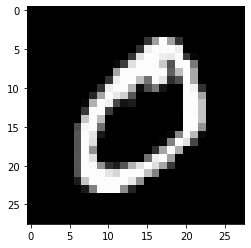

In [ ]:
plt.imshow(xtrain[1],cmap='gray')

In [ ]:
ytrain[1]

0

In [ ]:
###Create a neural network
### create the model
model=tf.models.Sequential()
###adding layers
model.add(tf.layers.Flatten()) ## input layer
model.add(tf.layers.Dense(784,activation='relu')) ## 28*28 = 784  ### hidden layer
model.add(tf.layers.Dense(10,activation='softmax'))

In [ ]:
##Compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
## Scale the data
xtrain=xtrain/255
xtest=xtest/255

In [ ]:
###Training the Model
model.fit(xtrain,ytrain,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0182 - accuracy: 0.9939
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0139 - accuracy: 0.9956
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0133 - accuracy: 0.9962
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0091 - accuracy: 0.9970
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0102 - accuracy: 0.9965
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0102 - accuracy: 0.9967
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0095 - accuracy: 0.9969
Epoch 8/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0099 - accuracy: 0.9970
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0065 - accuracy: 0.9979
Epoch 10/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0

In [ ]:
ypred=model.predict(xtest)

In [ ]:
ytest[200]

3

In [ ]:
ypred[200]

array([3.4219290e-15, 1.3093531e-09, 2.9058124e-06, 9.9998736e-01,
       6.6460643e-11, 1.9671800e-06, 2.4986589e-17, 2.2214444e-11,
       7.7558479e-06, 3.1886860e-09], dtype=float32)

In [ ]:
np.argmax(ypred[200])

3

In [ ]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.1437 - accuracy: 0.9813


[0.14370717108249664, 0.9812999963760376]

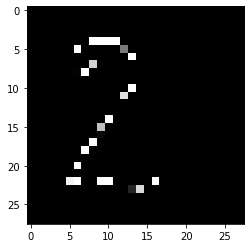

In [ ]:
import cv2
img=cv2.imread("predict.png",0)
img=cv2.bitwise_not(img)
img=cv2.resize(img,(28,28))
img=img/255
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
model.predict(np.array([[img]]))

array([[2.1911316e-04, 1.1863540e-03, 8.3836091e-01, 1.5617205e-01,
        1.4687781e-08, 1.1428775e-05, 1.5484328e-08, 1.1595169e-08,
        4.0500797e-03, 1.0750074e-08]], dtype=float32)